In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Task -1
### importing the dataset  

In [3]:
df=pd.read_csv('Assignment3.csv')

In [4]:
df.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      101 non-null    float64
 1   x2      101 non-null    float64
 2   x3      101 non-null    float64
 3   x4      101 non-null    float64
 4   x5      101 non-null    float64
 5   y       101 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


# Fitting the OLS model on the data 

In [7]:
import statsmodels.api as sm

In [8]:
X=df.drop('y',axis=1)

In [9]:
X = sm.add_constant(X)
X.head()

,const,x1,x2,x3,x4,x5
0,1.0,7.11,-447.71,135.66,92.41,96.04
1,1.0,7.06,-455.33,94.49,91.76,92.16
2,1.0,6.89,-466.86,186.25,89.54,100.00
3,1.0,7.25,-440.53,176.83,94.24,84.64
4,1.0,7.24,-445.92,185.90,94.11,88.36


In [10]:
y=df['y']

In [11]:
model = sm.OLS(y,X).fit()

In [12]:
yhat=model.predict(X)

In [13]:
def SSE(y,yhat):
    return np.sum((y-yhat)**2)

In [14]:
SSE(y,yhat)

71877.84134016861

The value of error is coming out to be very large.

# Task -2

# Now performing EDA :

In [18]:
X=X.drop('const',axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

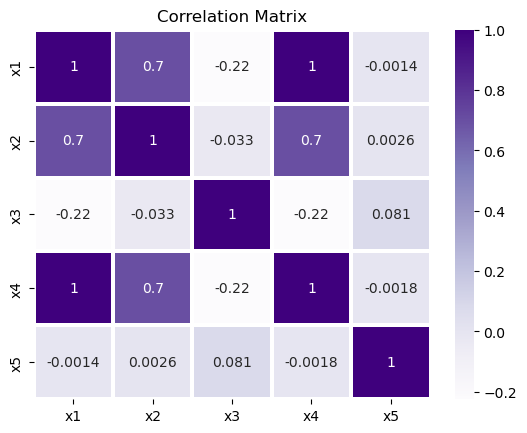

In [19]:
sns.heatmap(X.corr(),annot=True,linewidths=1.7,linecolor='white',cmap='Purples')
plt.title("Correlation Matrix")

x1 and x4 have high correlation 

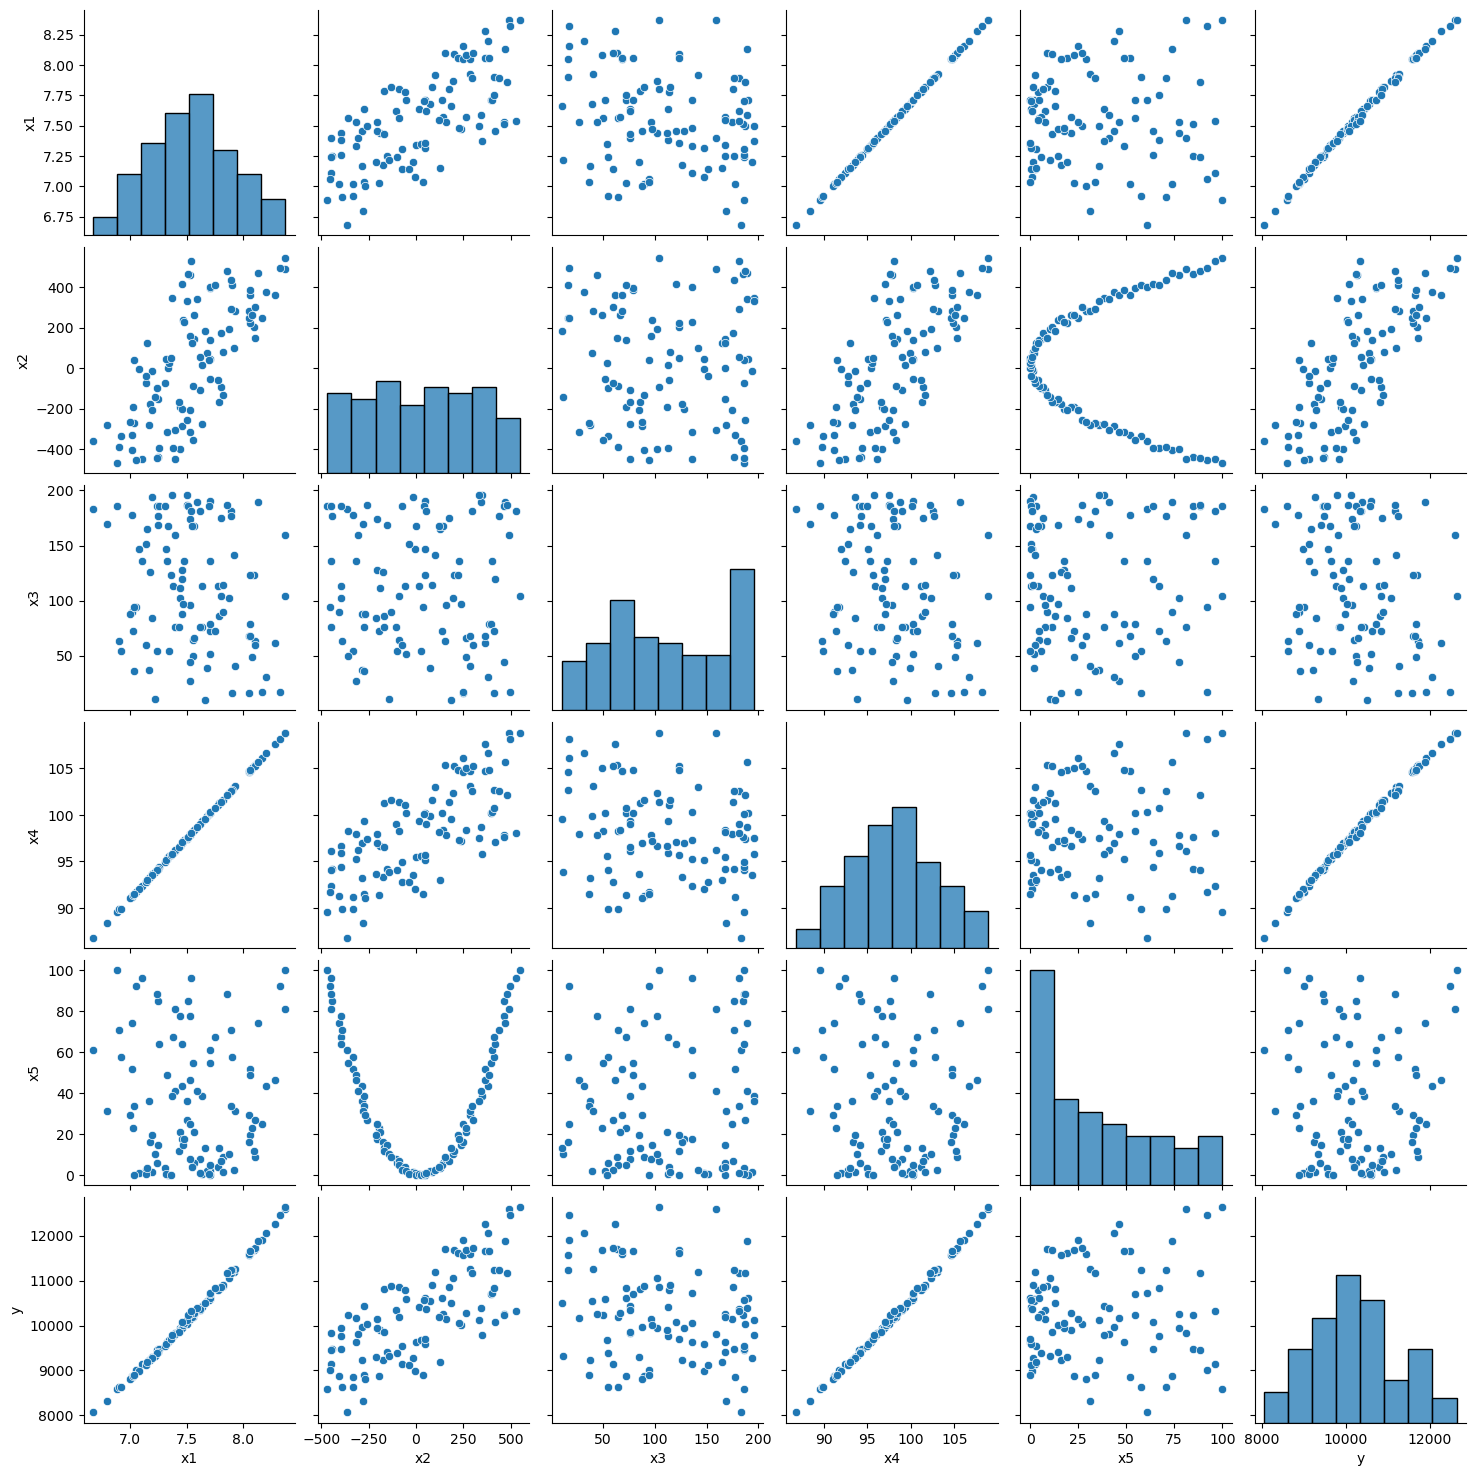

In [21]:
sns.pairplot(df)

<Axes: >

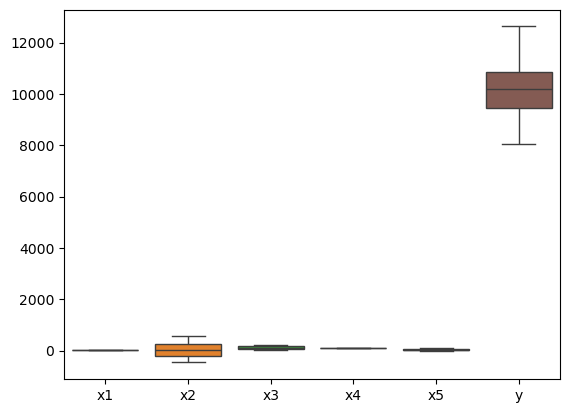

In [22]:
sns.boxplot(df)

Observations;
we can see that values in different columns of X have very large values and some have small values like x1has smaller values in comparison with x4.
so we will normalize the data to bring all of them to same scale.

# Task -3 (using some transformations on the imput featrures to get less error.)

In [25]:
df['log_x1'] = np.log1p(df['x1'])
df['sqrt_x3'] = np.sqrt(df['x3'])

In [26]:
df

,x1,x2,x3,x4,x5,y,log_x1,sqrt_x3
0,7.11,-447.71,135.66,92.41,96.04,9131.40,2.093098,11.647317
1,7.06,-455.33,94.49,91.76,92.16,9001.86,2.086914,9.720597
2,6.89,-466.86,186.25,89.54,100.00,8595.85,2.065596,13.647344
3,7.25,-440.53,176.83,94.24,84.64,9469.94,2.110213,13.297744
4,7.24,-445.92,185.90,94.11,88.36,9448.98,2.109000,13.634515
...,...,...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,11168.68,2.181547,13.676257
97,8.37,489.50,159.51,108.85,81.00,12605.81,2.237513,12.629727
98,8.32,496.95,17.12,108.16,92.16,12467.96,2.232163,4.137632
99,8.37,546.88,104.18,108.83,100.00,12631.05,2.237513,10.206860


In [27]:
X=df.drop(['y','x1','x3'],axis=1)

In [28]:
X

,x2,x4,x5,log_x1,sqrt_x3
0,-447.71,92.41,96.04,2.093098,11.647317
1,-455.33,91.76,92.16,2.086914,9.720597
2,-466.86,89.54,100.00,2.065596,13.647344
3,-440.53,94.24,84.64,2.110213,13.297744
4,-445.92,94.11,88.36,2.109000,13.634515
...,...,...,...,...,...
96,479.03,102.18,88.36,2.181547,13.676257
97,489.50,108.85,81.00,2.237513,12.629727
98,496.95,108.16,92.16,2.232163,4.137632
99,546.88,108.83,100.00,2.237513,10.206860


In [29]:
model = sm.OLS(y,X).fit()

In [30]:
yhat=model.predict(X)

In [31]:
yhat

0       9135.069930
1       9000.761364
2       8569.819832
3       9482.606468
4       9461.544739
           ...     
96     11186.019283
97     12557.518644
98     12435.034110
99     12588.447464
100    10355.933098
Length: 101, dtype: float64

In [32]:
SSE(y,yhat)

34159.8145657502

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['log_x1', 'x4', 'sqrt_x3', 'x2', 'x5']])
X_scaled

array([[-1.16972426e+00, -1.16394302e+00,  5.17411838e-01,
        -1.61794852e+00,  2.04038327e+00],
       [-1.30963084e+00, -1.29612233e+00, -1.47138847e-01,
        -1.64409843e+00,  1.91277710e+00],
       [-1.79189107e+00, -1.74756551e+00,  1.20724677e+00,
        -1.68366646e+00,  2.17062050e+00],
       [-7.82527140e-01, -7.91807423e-01,  1.08666527e+00,
        -1.59330858e+00,  1.66545791e+00],
       [-8.09965375e-01, -8.18243285e-01,  1.20282187e+00,
        -1.61180569e+00,  1.78780198e+00],
       [-3.74897696e-01, -4.03403604e-01, -4.91434884e-01,
        -1.62158617e+00,  1.54574490e+00],
       [-1.42218242e+00, -1.40186578e+00, -2.38509906e-01,
        -1.46866755e+00,  1.31421205e+00],
       [-2.67425656e-01, -2.95626628e-01, -1.49120480e-02,
        -1.44708186e+00,  1.42866295e+00],
       [-4.28825784e-01, -4.58308856e-01,  1.68198304e-01,
        -1.43428145e+00,  1.09320342e+00],
       [-1.73461808e+00, -1.68249262e+00, -7.43830204e-01,
        -1.41303894e+00

In [34]:
X_scaled = sm.add_constant(X_scaled)
transformed_model = sm.OLS(y, X_scaled).fit()

In [35]:
yhat_new=transformed_model.predict(X_scaled)

In [36]:
yhat_new

array([ 9129.86057758,  8999.20214368,  8591.01780082,  9471.77759455,
        9451.03825947,  9832.28645425,  8880.89504518,  9940.51440168,
        9763.95169947,  8629.4381967 ,  8058.34929677,  8616.92267939,
        8851.39777909,  9494.15674235, 10243.13328052,  9635.07031291,
        9236.97982057,  9977.82098842, 10180.34601476, 10453.64937204,
        8895.2152246 ,  9805.76091951,  8317.11048704, 10039.85969056,
        8817.09650073,  8889.03038408,  9896.63488855, 10144.74617582,
        9943.22213515,  9243.1779367 ,  9294.15404014, 10828.19497482,
        9396.28075701,  9863.47084174,  9328.09221754, 10342.43471994,
       10879.07944574,  9378.43578666, 10854.29022359,  9537.45318143,
       10197.52596667, 10779.17027595,  9133.06296268,  9273.77666025,
        8969.43985422, 10603.51752778,  9131.45411237, 10608.59262831,
        9637.09896943, 10409.80336548,  8888.61831406,  9675.11837782,
        9573.89770997,  9684.15111418, 10889.19865438, 10554.94131391,
      

In [37]:
SSE(y,yhat_new)

4197.951709666944

On using standard Scaler the error much dropped to 4197 approx.

In [39]:
df.head()

,x1,x2,x3,x4,x5,y,log_x1,sqrt_x3
0,7.11,-447.71,135.66,92.41,96.04,9131.40,2.093098,11.647317
1,7.06,-455.33,94.49,91.76,92.16,9001.86,2.086914,9.720597
2,6.89,-466.86,186.25,89.54,100.00,8595.85,2.065596,13.647344
3,7.25,-440.53,176.83,94.24,84.64,9469.94,2.110213,13.297744
4,7.24,-445.92,185.90,94.11,88.36,9448.98,2.109000,13.634515


In [40]:
X=df.drop(['x1','y','sqrt_x3'],axis=1)

In [41]:
X

,x2,x3,x4,x5,log_x1
0,-447.71,135.66,92.41,96.04,2.093098
1,-455.33,94.49,91.76,92.16,2.086914
2,-466.86,186.25,89.54,100.00,2.065596
3,-440.53,176.83,94.24,84.64,2.110213
4,-445.92,185.90,94.11,88.36,2.109000
...,...,...,...,...,...
96,479.03,187.04,102.18,88.36,2.181547
97,489.50,159.51,108.85,81.00,2.237513
98,496.95,17.12,108.16,92.16,2.232163
99,546.88,104.18,108.83,100.00,2.237513


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.61794852e+00,  4.37355081e-01, -1.16394302e+00,
         2.04038327e+00, -1.16972426e+00],
       [-1.64409843e+00, -3.03976177e-01, -1.29612233e+00,
         1.91277710e+00, -1.30963084e+00],
       [-1.68366646e+00,  1.34830840e+00, -1.74756551e+00,
         2.17062050e+00, -1.79189107e+00],
       [-1.59330858e+00,  1.17868634e+00, -7.91807423e-01,
         1.66545791e+00, -7.82527140e-01],
       [-1.61180569e+00,  1.34200610e+00, -8.18243285e-01,
         1.78780198e+00, -8.09965375e-01],
       [-1.62158617e+00, -6.35477476e-01, -4.03403604e-01,
         1.54574490e+00, -3.74897696e-01],
       [-1.46866755e+00, -3.95449648e-01, -1.40186578e+00,
         1.31421205e+00, -1.42218242e+00],
       [-1.44708186e+00, -1.67126103e-01, -2.95626628e-01,
         1.42866295e+00, -2.67425656e-01],
       [-1.43428145e+00,  3.11264389e-02, -4.58308856e-01,
         1.09320342e+00, -4.28825784e-01],
       [-1.41303894e+00, -8.55698056e-01, -1.68249262e+00,
         1.20239221e+00

In [43]:
X_scaled = sm.add_constant(X_scaled)
transformed_model = sm.OLS(y, X_scaled).fit()

In [44]:
yhat_new=transformed_model.predict(X_scaled)

In [45]:
SSE(y,yhat_new)

4193.675207604457

### The error little dropped to 4193 approx

# Task -4

In [48]:
import lazypredict

In [49]:
from lazypredict.supervised import LazyRegressor

In [50]:
from sklearn.model_selection import train_test_split

### Splitting into the training and testing data

In [52]:
X

,x2,x3,x4,x5,log_x1
0,-447.71,135.66,92.41,96.04,2.09
1,-455.33,94.49,91.76,92.16,2.09
2,-466.86,186.25,89.54,100.00,2.07
3,-440.53,176.83,94.24,84.64,2.11
4,-445.92,185.90,94.11,88.36,2.11
...,...,...,...,...,...
96,479.03,187.04,102.18,88.36,2.18
97,489.50,159.51,108.85,81.00,2.24
98,496.95,17.12,108.16,92.16,2.23
99,546.88,104.18,108.83,100.00,2.24


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, 1:], y, test_size=0.25, random_state=42)

In [54]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

100%|████████████████████████████████████████| 42/42 [00:02<00:00, 18.60it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 5
[LightGBM] [Info] Start training from score 10226.177760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [55]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

100%|████████████████████████████████████████| 42/42 [00:02<00:00, 19.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 5
[LightGBM] [Info] Start training from score 10226.177760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [56]:
print(models)   #to display  the model working.

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
OrthogonalMatchingPursuitCV                  1.00       1.00     8.28   
Lars                                         1.00       1.00     8.28   
LinearRegression                             1.00       1.00     8.28   
LassoLarsIC                                  1.00       1.00     8.28   
LassoLarsCV                                  1.00       1.00     8.28   
RANSACRegressor                              1.00       1.00     8.28   
TransformedTargetRegressor                   1.00       1.00     8.28   
BayesianRidge                                1.00       1.00     8.35   
HuberRegressor                               1.00       1.00    10.11   
PoissonRegressor                             1.00       1.00    13.21   
LassoLars                                    1.00       1.00    39.66   
Lasso                                        1.00  

'LazyRegressor'automatically fits multiple regression models to the data and reports their performance metrics. We compare these metrics (like RMSE) with the OLS model's performance to determine which model works best.

In [58]:
from sklearn.metrics import mean_squared_error
rmse_ols = np.sqrt(mean_squared_error(y_test, transformed_model.predict(sm.add_constant(X_test))))
print(f"RMSE for OLS model: {rmse_ols}")

RMSE for OLS model: 6.693780870200582


# Reasons for the difference in the performance of models (run above):


We can see that RMSE of Lasso is less than Ridge which we expected as columns x1 and x4 of our features
we have strong correlation - and we know that when any two rows.columns are same then determinant is 0 which here happens 
with Ridge regression leading to poor performance in comparison to Lasso.

Also Lasso makes the weights 0 when a particular column feature is not contributing much to the output , but ridge regression
make it cloase to zero , hence Rige can't be used in fesature selection.


Other models are not predicting that well may be because they are not able to train well on the data provided and compared to 
first 10 models in the above table.

In conclusion, data preprocessing and careful model selection are crucial for minimizing error and improving regression accuracy, especially when the dataset contains nonlinearities and multicollinearity.